# BANK LOAN ANALYSIS REPORT

### Import Libraries

In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import plotly.express as px 

In [75]:
df = pd.read_csv("financial_loan.csv")

In [76]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### Metadata of Data

In [77]:
print("Number of Rows:", df.shape[0])

Number of Rows: 38576


In [78]:
print("Number of Columns:", df.shape[1])

Number of Columns: 24


In [79]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT   2/11/2021   
1                       MKC Accounting     E           RENT    1/1/2021   
2                Chema

### Data Types

In [80]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [81]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Total Loan Applications

In [82]:
total_loan_application= df["id"].count()
print("Total Loan Applications:", total_loan_application)


Total Loan Applications: 38576


### MTD Total Loan Applications

In [83]:
df["issue_date"] = pd.to_datetime(df["issue_date"])

latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_loan_applications = mtd_data["id"].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")


MTD Loan Applications (for December 2021): 4314


### Total Funded Amount

In [84]:
total_funded_amount= df["loan_amount"].sum()
total_funded_amount_millions= total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))


Total Funded Amount: $435.76M


### MTD - Total Funded Amount

In [85]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]


mtd_total_funded_amount = mtd_data["loan_amount"].sum()
mtd_total_funded_amount_millions= mtd_total_funded_amount/1000000


print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


### Total Amount Recieved 

In [86]:
total_amount_received= df["total_payment"].sum()
total_amount_received_millions= total_funded_amount/1000000
print("Total Amount Received: ${:.2f}M".format(total_amount_received_millions))

Total Amount Received: $435.76M


### MTD Total Amount Received

In [87]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_total_amount_received = mtd_data["total_payment"].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000

print("MTD Total Funded Amount Received: ${:.2f}M".format(mtd_total_amount_received_millions))


MTD Total Funded Amount Received: $58.07M


### Average Interest Rate

In [88]:
average_interest_rate = df["int_rate"].mean()*100
print("Avg Interest Rate: {:.2f}%".format(average_interest_rate))


Avg Interest Rate: 12.05%


### Average Debt To Income Ratio (DTI)

In [89]:
average_dti = df["dti"].mean()*100
print("Avg DTI: {:.2f}%".format(average_dti))


Avg DTI: 13.33%


### Good Loan Metrics

In [90]:
good_loans= df[df["loan_status"].isin(["Fully Paid", "Current"])]

total_loan_applications = df["id"].count()

good_loan_applications= good_loans["id"].count()
good_loan_funded_amount= good_loans["loan_amount"].sum()
good_loan_received = good_loans["total_payment"].sum()

good_loan_funded_amount_millions= good_loan_funded_amount/1_000_000
good_loan_received_millions= good_loan_received/1_000_000

good_loan_percentage=(good_loan_applications/ total_loan_applications)*100

print("Good Loan Applications: ", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications:  33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [91]:
bad_loans= df[df["loan_status"].isin(["Charged Off"])]

total_loan_applications = df["id"].count()

bad_loan_applications= good_loans["id"].count()
bad_loan_funded_amount= good_loans["loan_amount"].sum()
bad_loan_received = good_loans["total_payment"].sum()

bad_loan_funded_amount_millions= bad_loan_funded_amount/1_000_000
bad_loan_received_millions= bad_loan_received/1_000_000

bad_loan_percentage=(bad_loan_applications/ total_loan_applications)*100

print("Bad Loan Applications: ", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications:  33243
Bad Loan Funded Amount (in Millions): $370.22M
Bad Loan Total Received (in Millions): $435.79M
Percentage of Bad Loan Applications: 86.18%


### Monthly Trends by Issue Date for Total Funded Amount

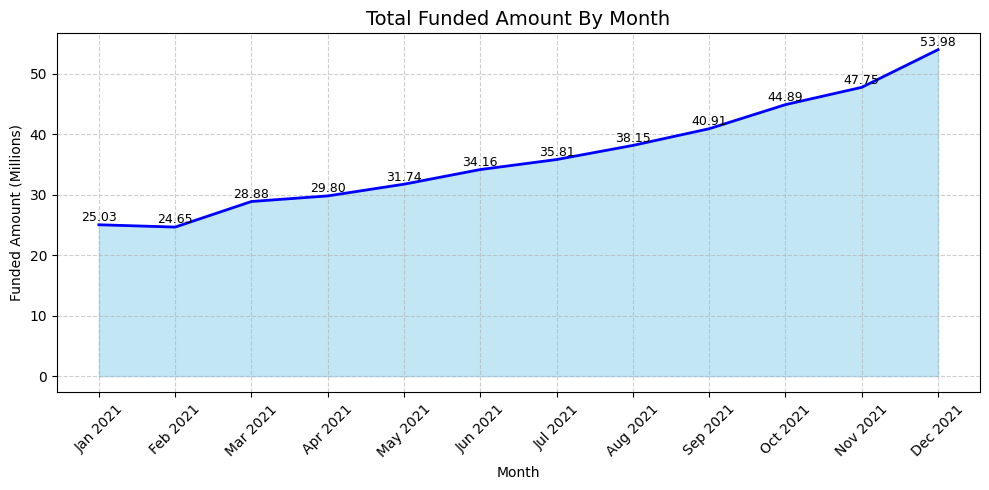

In [92]:
import matplotlib.pyplot as plt

monthly_funded = (
    df.sort_values("issue_date")
      .assign(month_name=lambda x: x["issue_date"].dt.strftime("%b %Y"))
      .groupby("month_name", sort=False)["loan_amount"]
      .sum()
      .div(1_000_000)
      .reset_index(name="loan_amount_millions")
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded["month_name"], monthly_funded["loan_amount_millions"], color="skyblue", alpha=0.5)
plt.plot(monthly_funded["month_name"], monthly_funded["loan_amount_millions"], color="blue", linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row["loan_amount_millions"] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha="center", va="bottom", fontsize=9, rotation=0, color="black")

plt.title("Total Funded Amount By Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Funded Amount (Millions)")
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded["month_name"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends By Issue Date For Total Amount Received

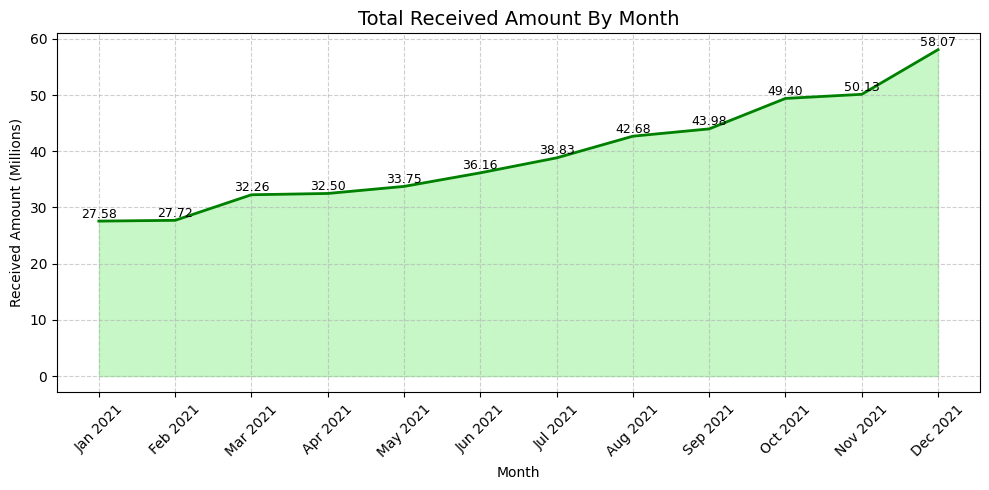

In [93]:
import matplotlib.pyplot as plt

monthly_funded = (
    df.sort_values("issue_date")
      .assign(month_name=lambda x: x["issue_date"].dt.strftime("%b %Y"))
      .groupby("month_name", sort=False)["total_payment"]
      .sum()
      .div(1000000)
      .reset_index(name="received_amount_millions")
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded["month_name"], monthly_funded["received_amount_millions"], color="lightgreen", alpha=0.5)
plt.plot(monthly_funded["month_name"], monthly_funded["received_amount_millions"], color="green", linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row["received_amount_millions"] + 0.1, f"{row['received_amount_millions']:.2f}",
             ha="center", va="bottom", fontsize=9, rotation=0, color="black")

plt.title("Total Received Amount By Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Received Amount (Millions)")
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded["month_name"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends by Issue Date for Total Loan Applications

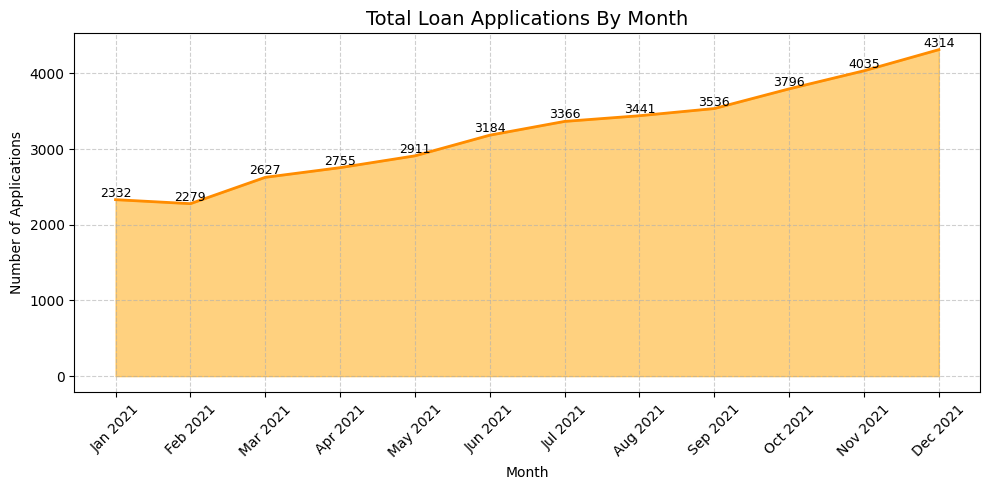

In [94]:
monthly_applications=(
    df.sort_values("issue_date")
    .assign(month_name=lambda x: x["issue_date"].dt.strftime("%b %Y"))
    .groupby("month_name", sort=False)["id"]
    .count()
    .reset_index(name="loan_applications_count")
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications["month_name"], monthly_applications["loan_applications_count"],
                 color="orange", alpha=0.5)
plt.plot(monthly_applications["month_name"], monthly_applications["loan_applications_count"],
         color="darkorange", linewidth=2)


for i, row in monthly_applications.iterrows():
    plt.text(i, row["loan_applications_count"] + 0.5, f"{row["loan_applications_count"]}",
             ha="center", va="bottom", fontsize=9, rotation=0, color="black")

plt.title("Total Loan Applications By Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications["month_name"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




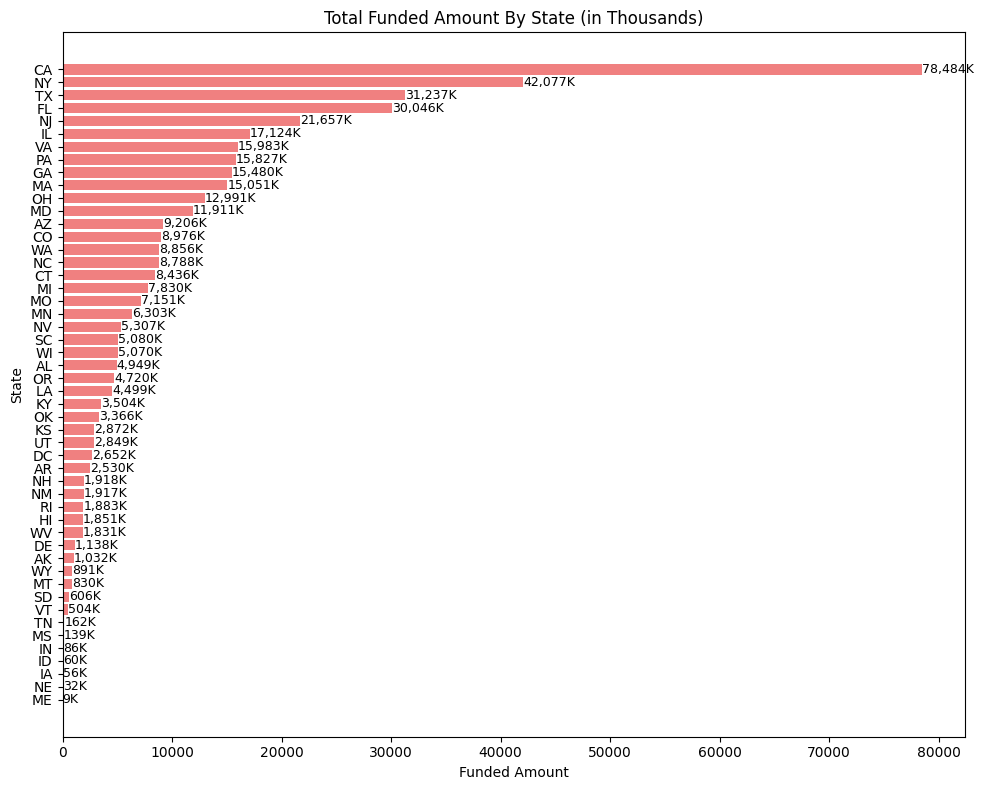

In [95]:
import matplotlib.pyplot as plt

state_funding = df.groupby("address_state")["loan_amount"].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color="lightcoral")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va="center", fontsize=9)

plt.title("Total Funded Amount By State (in Thousands)")
plt.xlabel("Funded Amount")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### Loan Term Analysis by Total Funded Amount

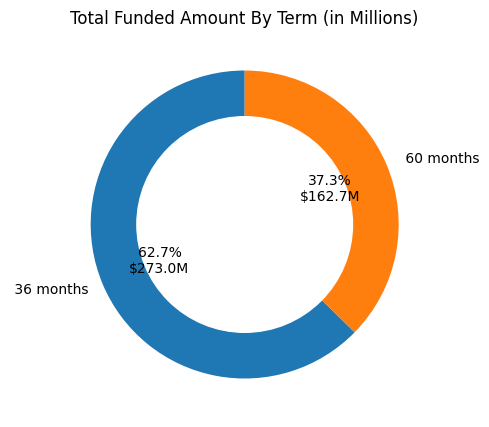

In [96]:
term_funding_millions= df.groupby("term")["loan_amount"].sum()/1000000


plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={"width":0.4}
)

plt.gca().add_artist(plt.Circle((0,0),0.70,color="white"))
plt.title("Total Funded Amount By Term (in Millions)")
plt.show()


    

### Employee Length By Total Funded Amount

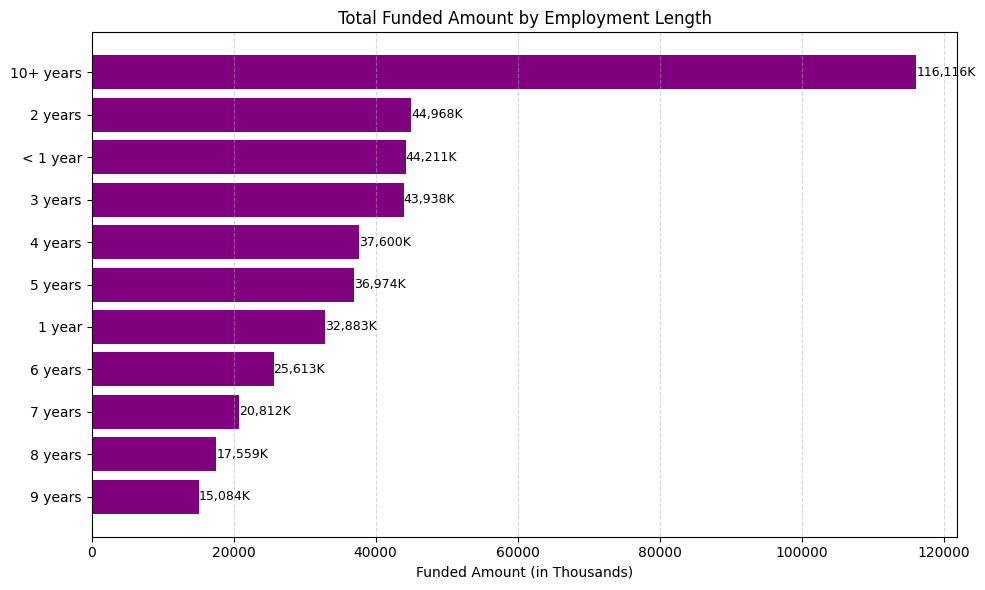

In [97]:
emp_funding = df.groupby("emp_length")["loan_amount"].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding.values, color="purple")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va="center", fontsize=9)

plt.xlabel("Funded Amount (in Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose By Total Funded Amount

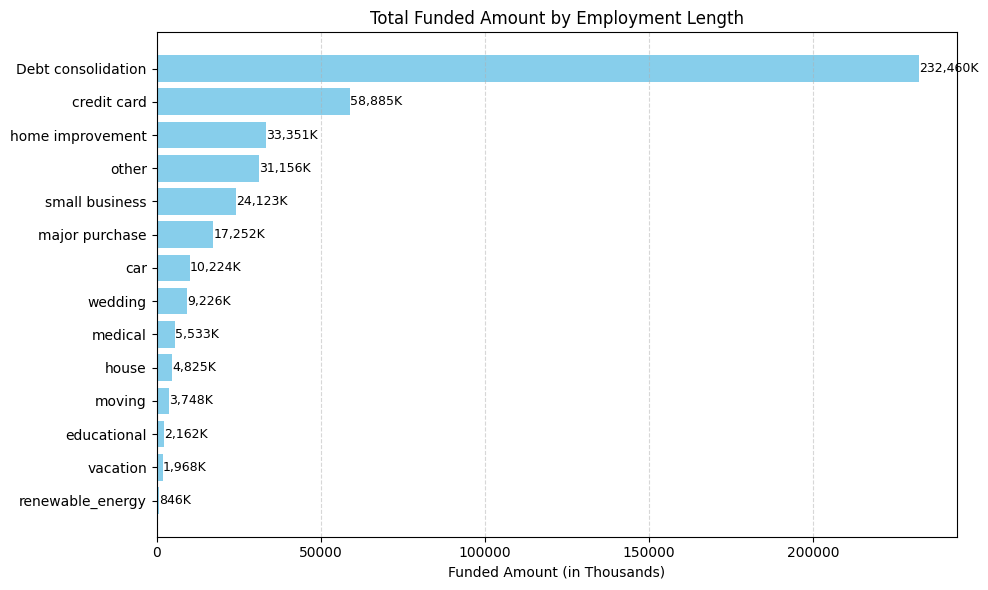

In [98]:
emp_funding = df.groupby("purpose")["loan_amount"].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding.values, color="skyblue")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va="center", fontsize=9)

plt.xlabel("Funded Amount (in Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Home Ownership by Total Funded Amount

In [99]:

home_funding = df.groupby("home_ownership")["loan_amount"].sum().reset_index()
home_funding["loan_amount_millions"] = home_funding["loan_amount"] / 1000000

fig = px.treemap(
    home_funding,
    path=["home_ownership"],
    values="loan_amount_millions",
    color="loan_amount_millions",
    color_continuous_scale="Blues",
    title="Total Funded Amount By Home Ownership (in Millions)"
)

fig.show()
